# Cybersecurity Salaries Analysis

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading and processing dataset 

Motiviation to use this dataset: The dataset that we will use in this notebook is the

# Step 0: Goal definition

### Problem Statement
The objective of this project is to explore and analyze the dataset on global salaries in the cybersecurity sector. We aim to identify the key factors that influence salaries and develop advanced models to predict the salary range of professionals. Additionally, we will employ clustering techniques to discover hidden patterns and use Explainable AI (XAI) methods to interpret the models' predictions.

### Project Goals
1. **Classification Task**:
    - Build Machine Learning models to predict salary ranges (low, medium, high) based on features like role, experience, location, and other relevant characteristics.
    - Evaluate model performance using appropriate metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
2. **Clustering Analysis**:
    - Apply clustering algorithms (e.g., K-Means, DBSCAN) to identify hidden patterns or groups among professionals based on their features.
    - Visualize clusters using PCA or t-SNE to explore their characteristics.
3. **Address Class Imbalance**:
    - Use techniques like SMOTE (Synthetic Minority Oversampling) or Random Undersampling to manage class imbalance, ensuring fair and robust model performance.
4. **Explainable AI (XAI)**:
    - Integrate SHAP (SHapley Additive Explanations) and LIME (Local Interpretable Model-Agnostic Explanations) to interpret the models.
    - Explain feature importance and their impact on salary predictions.
5. **Model comparison**:
    - Compare the performance of various Machine Learning algorithms:
        Logistic Regression
        Random Forest
        CatBoost
    - Analyze the effect of sampling methods on performance metrics.


### Final Deliverables
- A well-documented analysis of salary prediction using classification models.
- Insights derived from clustering analysis to identify trends and patterns in the dataset.
- Model evaluation using multiple metrics and cross-validation techniques.
- Explainable AI results to interpret model behavior and explain feature contributions.
- Visualizations and a comprehensive discussion of results, challenges, and future improvements.


# Step 1: data acquisition

In this step, we will load the dataset and verify its structure to ensure it has been correctly imported.



In [23]:
# Step 1: Data Acquisition


# Loading the dataset
file_path = "dataset/salaries.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print("First rows of the dataset:")
display(df.head())

# Checking basic information about the dataset
print("\nDataset Information:")
display(df.info())


First rows of the dataset:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


None

# Step 2: data exploration

Dataset Overview:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


None


Descriptive Statistics for Numerical Features:


,work_year,salary,salary_in_usd,remote_ratio
count,22609.000000,2.260900e+04,22609.00000,22609.000000
mean,2023.656376,2.009111e+05,147521.95002,23.543722
std,0.735059,5.198490e+06,63453.23768,41.969535
min,2020.000000,1.506100e+04,15061.00000,0.000000
25%,2024.000000,1.000000e+05,100000.00000,0.000000
50%,2024.000000,1.380000e+05,138000.00000,0.000000
75%,2024.000000,1.850000e+05,184000.00000,0.000000
max,2024.000000,6.000000e+08,720000.00000,100.000000



Visualizing Numerical Features:


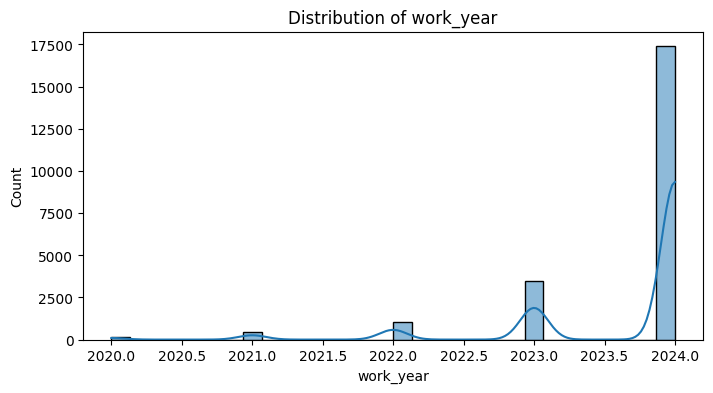

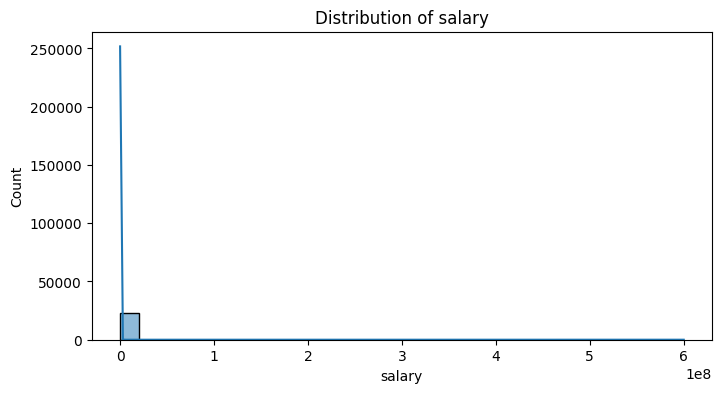

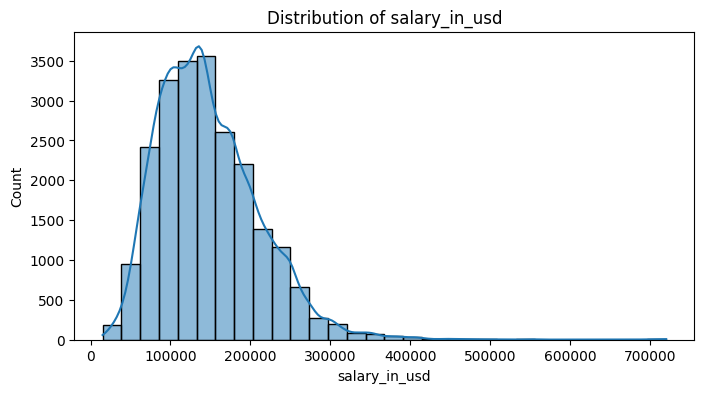

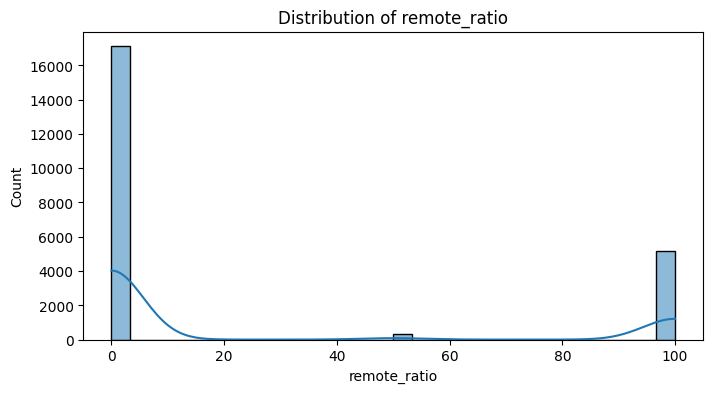

In [24]:
# Step 2: Data Exploration - Part 1


# Loading the dataset
file_path = "dataset/salaries.csv"
df = pd.read_csv(file_path)

# 1. Overview of the dataset
print("Dataset Overview:")
display(df.head())
print("\nDataset Info:")
display(df.info())

# 2. Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Visualizing numerical features
print("\nVisualizing Numerical Features:")

# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

# 3. Analysis of the target variable (salary class)
# Assuming the target column is named 'Salary_Class'
# if 'Salary_Class' in df.columns:
#     print("\nDistribution of Target Variable (Salary_Class):")
#     salary_counts = df['Salary_Class'].value_counts()
#     print(salary_counts)

#     # Plot the distribution of the target variable
#     plt.figure(figsize=(8, 5))
#     sns.countplot(x='Salary_Class', data=df)
#     plt.title("Distribution of Salary Classes")
#     plt.xlabel("Salary Class")
#     plt.ylabel("Count")
#     plt.show()
# else:
#     print("Warning: 'Salary_Class' column not found. Verify the target variable name.")



Creating 'Salary_Class' based on the 'Salary' column...

Distribution of Salary Classes:
Salary_Class
Medium    7558
Low       7551
High      7500
Name: count, dtype: int64


/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/188971943.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Salary_Class', data=df, palette='viridis')


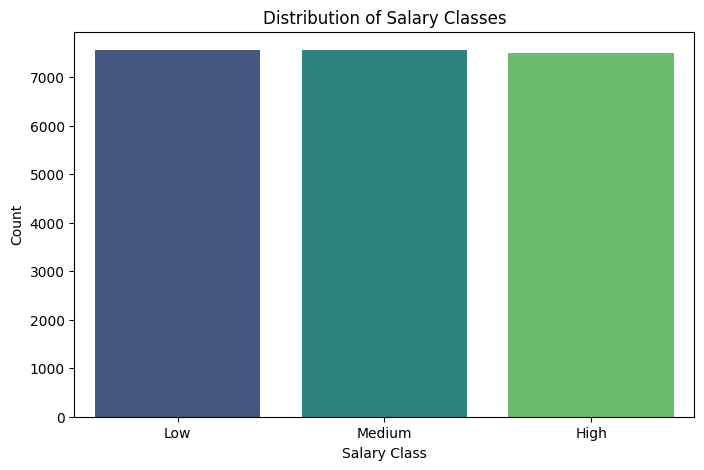

In [25]:
# Step 2: Creating a Target Variable

# Check if 'Salary' column exists
if 'salary_in_usd' in df.columns:
    print("\nCreating 'Salary_Class' based on the 'Salary' column...")

    # Creating 3 salary classes using quantiles: Low, Medium, High
    df['Salary_Class'] = pd.qcut(df['salary_in_usd'], q=3, labels=['Low', 'Medium', 'High'])
    
    # Displaying the distribution of the newly created Salary_Class
    print("\nDistribution of Salary Classes:")
    print(df['Salary_Class'].value_counts())

    # Plot the target variable distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Salary_Class', data=df, palette='viridis')
    plt.title("Distribution of Salary Classes")
    plt.xlabel("Salary Class")
    plt.ylabel("Count")
    plt.show()
else:
    print("Error: 'Salary' column not found. Please check the dataset structure.")


/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


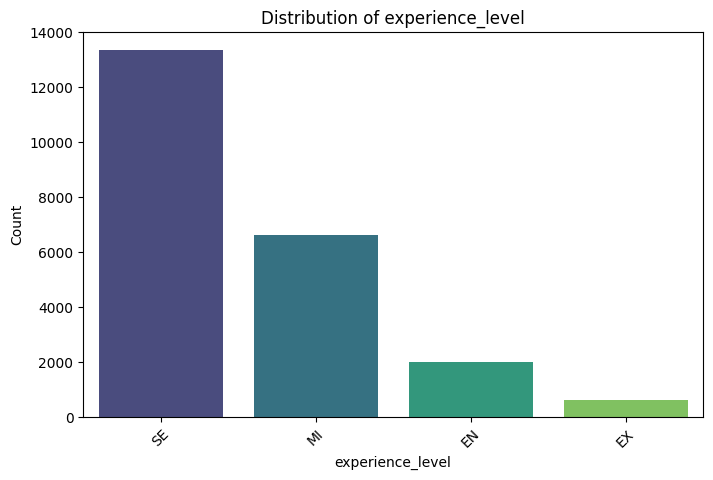

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


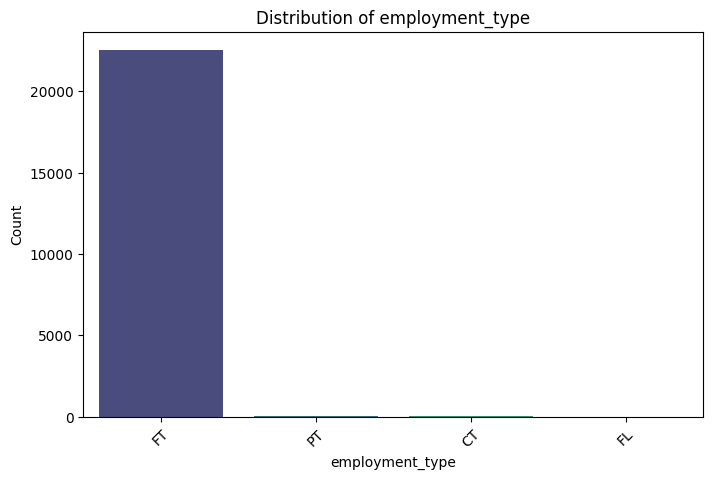

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


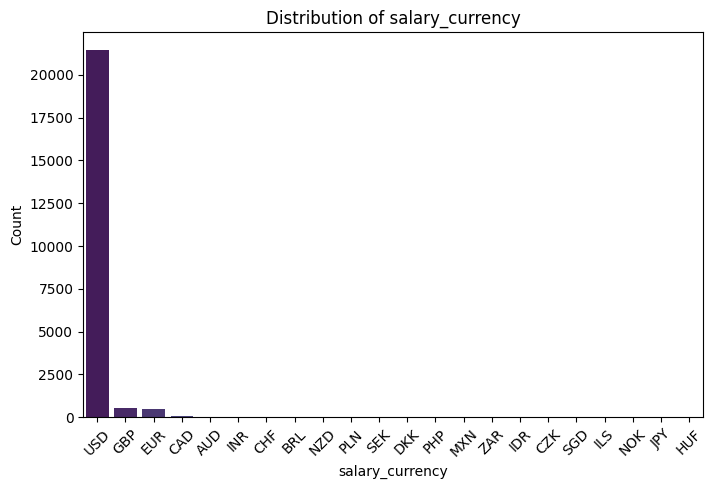

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)


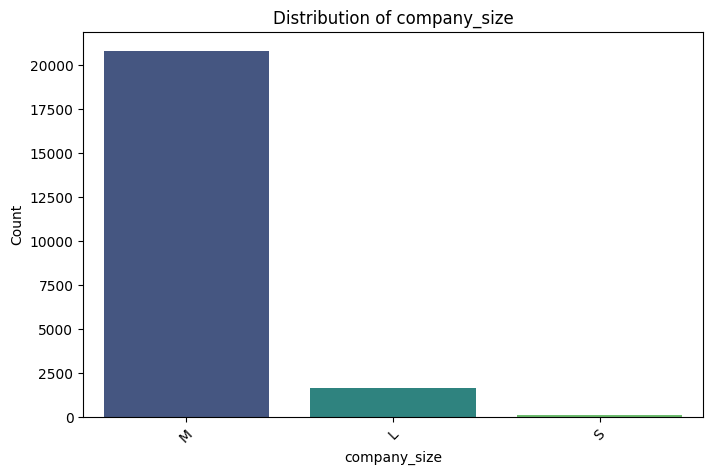

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df[df[column].isin(top_15)], palette='viridis',


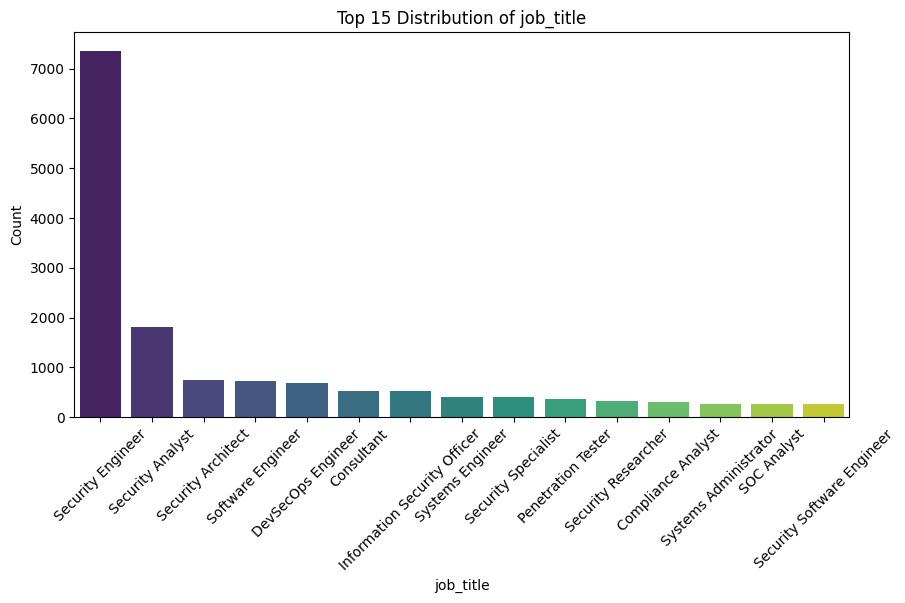

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df[df[column].isin(top_15)], palette='viridis',


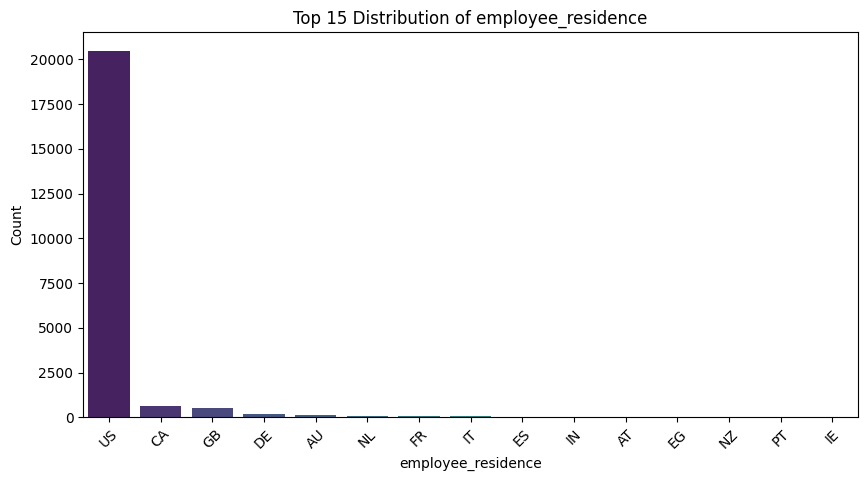

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_18672/15477423.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df[df[column].isin(top_15)], palette='viridis',


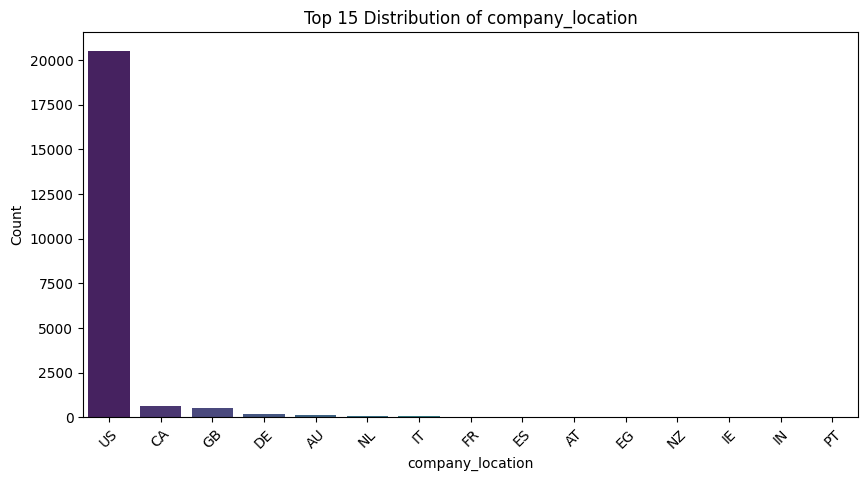


Analyzing Relationship Between Categorical Features and Salary_Class:


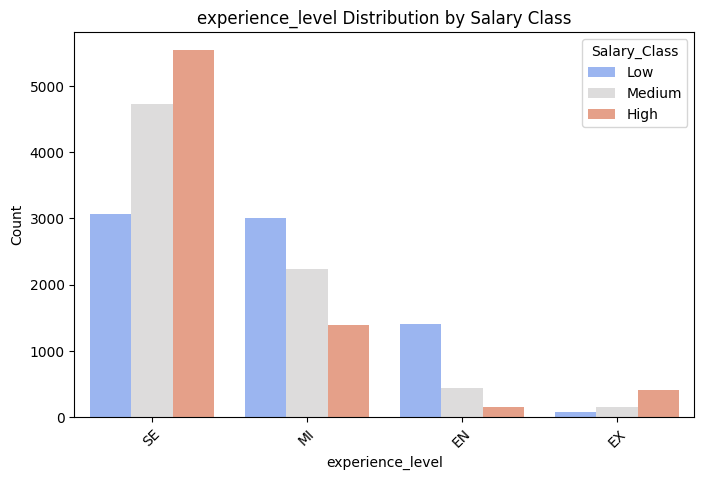

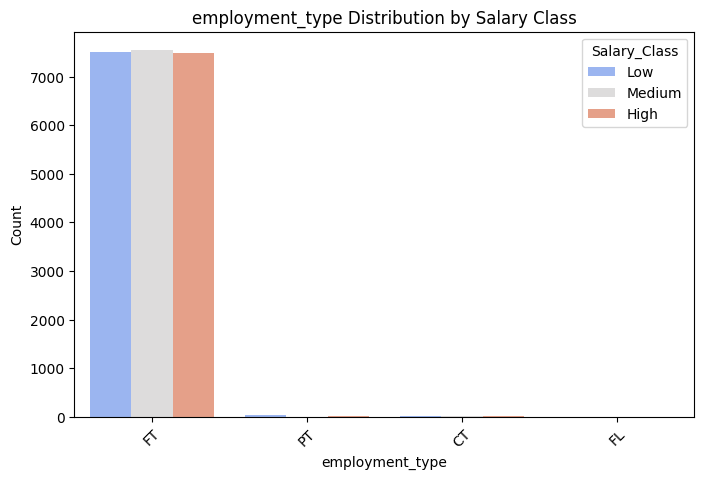

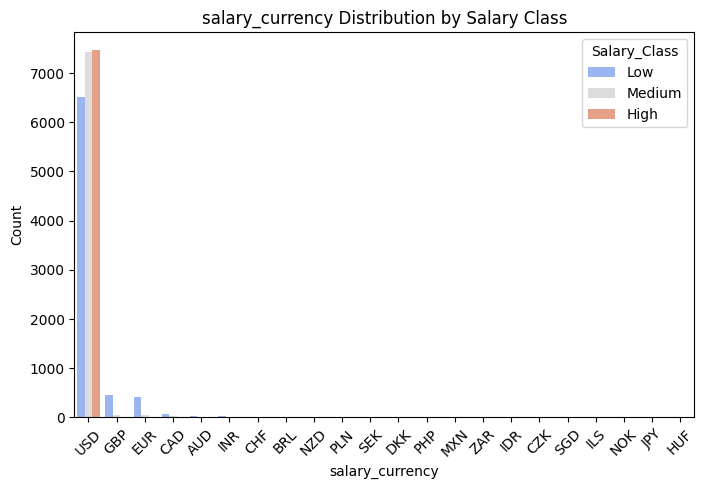

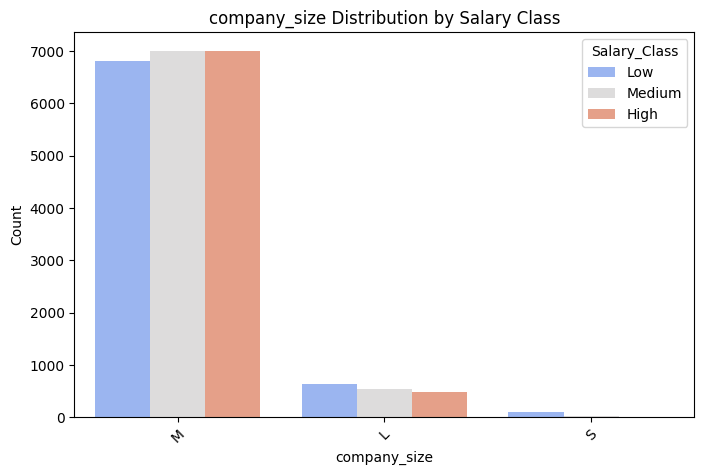

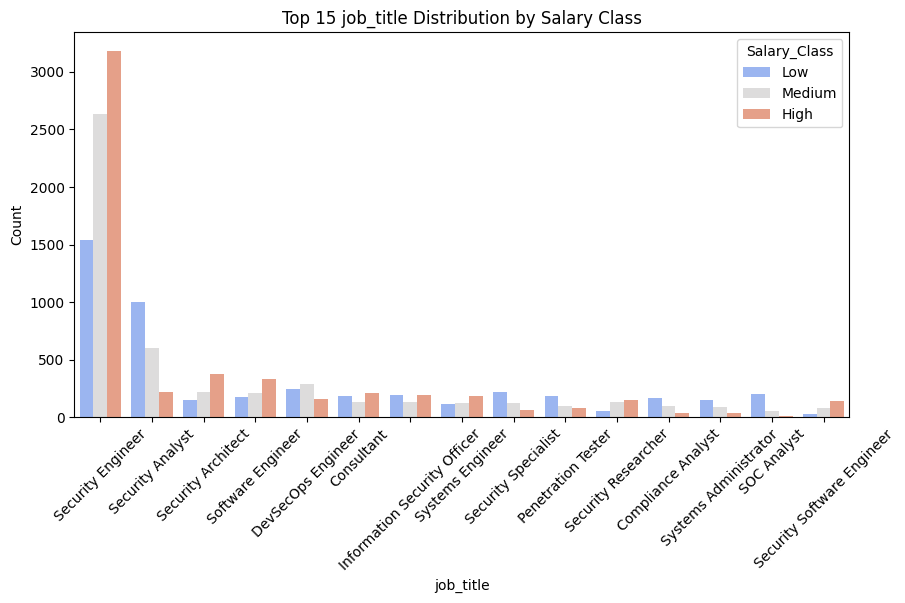

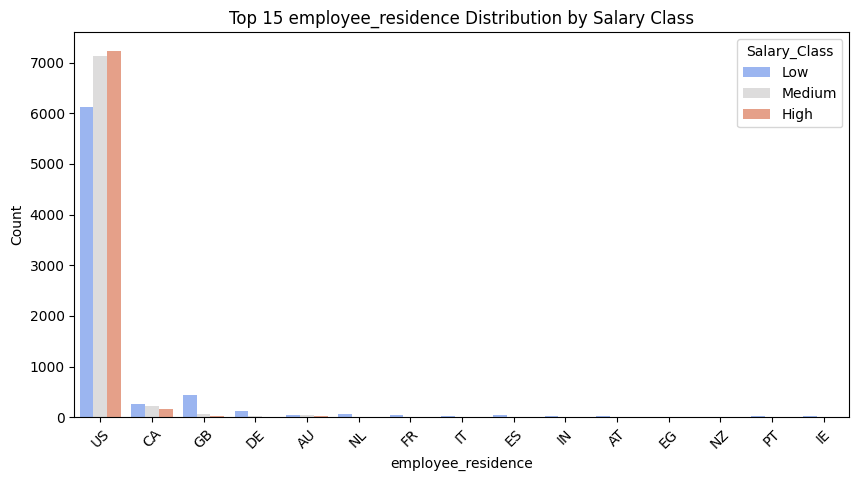

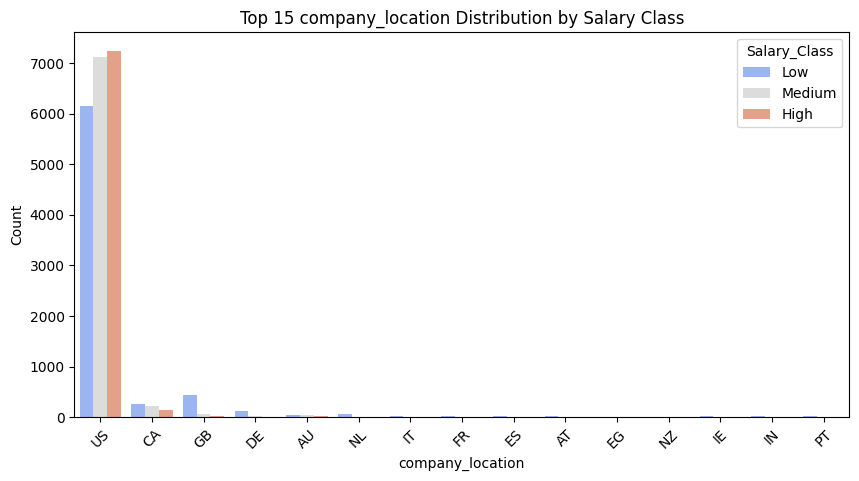

In [28]:
# Step 2: Data Exploration - Part 2 (Customized for Each Categorical Feature)

# Features to analyze
nominal_columns = ['experience_level', 'employment_type', 'job_title', 
                   'salary_currency', 'employee_residence', 'company_location', 'company_size']

# Separate features without problems and with problems of many categories
features_no_problem = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
features_problematic = ['job_title', 'employee_residence', 'company_location']

# 1. Distribution of Categorical Features

# Features without problems
for column in features_no_problem:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df, palette='viridis', order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Features with many categories: showing top 15
for column in features_problematic:
    top_15 = df[column].value_counts().head(15).index
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df[df[column].isin(top_15)], palette='viridis', 
                  order=top_15)
    plt.title(f"Top 15 Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 2. Relationship Between Categorical Features and Target Variable (Salary_Class)
if 'Salary_Class' in df.columns:
    print("\nAnalyzing Relationship Between Categorical Features and Salary_Class:")

    # Features without problems
    for column in features_no_problem:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=column, hue='Salary_Class', data=df, palette='coolwarm',
                      order=df[column].value_counts().index)
        plt.title(f"{column} Distribution by Salary Class")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

    # Features with many categories: showing top 15
    for column in features_problematic:
        top_15 = df[column].value_counts().head(15).index
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, hue='Salary_Class', data=df[df[column].isin(top_15)], 
                      palette='coolwarm', order=top_15)
        plt.title(f"Top 15 {column} Distribution by Salary Class")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("\nWarning: 'Salary_Class' not found. Ensure target variable creation is complete.")
